In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_tiff_datasets(carpeta):
    carpeta_archivos = f"C:/Users/Bianca/Documents/Archivos/ITBA/Tesis_Maestria/SAR_despeckling_filters_dataset/Main_folder/{carpeta}/"
    archivos_tiff = [f for f in os.listdir(carpeta_archivos) if f.endswith('.tiff')]

    num_imagenes = len(archivos_tiff)
    array_final = np.empty((num_imagenes, 512, 512), dtype=np.uint8)

    for i, archivo in enumerate(archivos_tiff):
        imagen = Image.open(os.path.join(carpeta_archivos, archivo))
        array_imagen = np.array(imagen)[:, :, 0]
        array_final[i] = array_imagen
        
        if (i+1) % 250 == 0:
            print(f'{i+1} de {num_imagenes} imágenes procesadas')

    print(f'\nArray final shape: {array_final.shape}')
    print(f'Máximo valor: {array_final.max()}, mínimo valor: {array_final.min()}')
    
    return array_final

In [3]:
noisy = load_tiff_datasets('Noisy')

250 de 1500 imágenes procesadas
500 de 1500 imágenes procesadas
750 de 1500 imágenes procesadas
1000 de 1500 imágenes procesadas
1250 de 1500 imágenes procesadas
1500 de 1500 imágenes procesadas

Array final shape: (1500, 512, 512)
Máximo valor: 255, mínimo valor: 0


In [4]:
clean = load_tiff_datasets('GTruth')

250 de 1500 imágenes procesadas
500 de 1500 imágenes procesadas
750 de 1500 imágenes procesadas
1000 de 1500 imágenes procesadas
1250 de 1500 imágenes procesadas
1500 de 1500 imágenes procesadas

Array final shape: (1500, 512, 512)
Máximo valor: 255, mínimo valor: 0


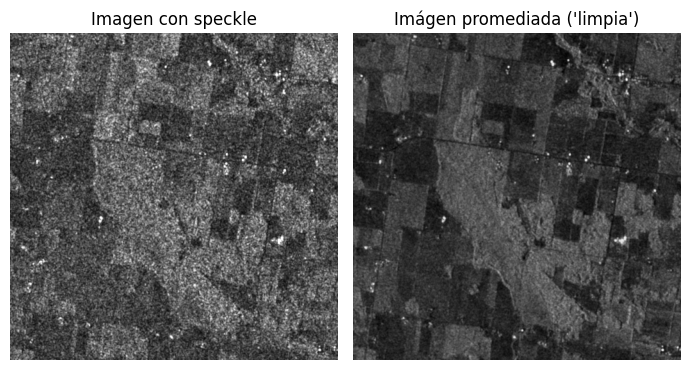

In [5]:
index = 58 # Index random

plt.figure(figsize=(7, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy[index], cmap='gray')
plt.title("Imagen con speckle")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clean[index], cmap='gray')
plt.title("Imágen promediada ('limpia')")
plt.axis('off')

plt.tight_layout()
plt.show()